Polygon
Polygon
Circle
Circle
Triangle
Polygon
Polygon
Polygon
Polygon
Polygon
Circle
Rectangle
Polygon
Polygon
Circle
Polygon
Polygon
Polygon
Circle
Polygon
Circle
Circle
Polygon
Polygon
Polygon
Circle
Polygon
Polygon
Polygon
Polygon
Polygon
Circle
Polygon
Circle
Circle
Circle
Circle
Polygon
Square
Circle
Polygon
Circle
Circle
Circle
Polygon
Polygon
Polygon
Circle
Circle
Polygon
Polygon


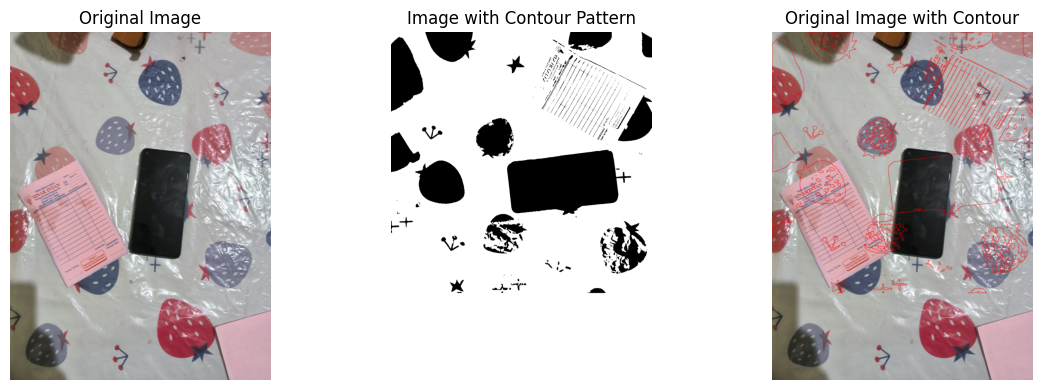

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def detect_shapes(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    
    # Konversi ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Lakukan thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Temukan kontur
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Inisialisasi array untuk menyimpan hasil bentuk
    shapes = []
    
    # Loop melalui setiap kontur
    for contour in contours:
        # Hitung jumlah titik sudut pada kontur
        num_corners = len(contour)
        
        # Jika jumlah sudut dekat dengan jumlah titik sudut pada lingkaran, itu adalah lingkaran
        if num_corners >= 8 and num_corners <= 23:
            shapes.append("Circle")
        # Jika kontur memiliki 3 sisi, itu adalah segitiga
        elif num_corners == 3:
            shapes.append("Triangle")
        # Jika kontur memiliki 4 sisi, itu bisa jadi persegi atau persegi panjang
        elif num_corners == 4:
            shapes.append("Square" if cv2.isContourConvex(contour) else "Rectangle")
        # Jika kontur memiliki lebih dari 4 sisi, itu bisa jadi poligon lainnya
        else:
            shapes.append("Polygon")
    
    return shapes

# Path gambar
image_path = 'baru.jpeg'

# Panggil fungsi untuk mendeteksi bentuk gambar
detected_shapes = detect_shapes(image_path)

# Cetak hasil
for shape in detected_shapes:
    print(shape)

# Baca gambar
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi ke skala abu-abu
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Lakukan thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Temukan kontur menggunakan scikit-image
contours = measure.find_contours(thresh, 0.5)

# Buat gambar dengan pola kontur
image_with_contour_pattern = np.ones_like(image) * 255
for contour in contours:
    contour = np.around(contour).astype(np.int32)
    cv2.drawContours(image_with_contour_pattern, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

# Buat gambar dengan kontur saja
image_with_contour = np.copy(image)
for contour in contours:
    contour = np.around(contour).astype(np.int32)
    cv2.polylines(image_with_contour, [contour], True, (255, 0, 0), thickness=2)

# Tampilkan gambar asli, gambar dengan pola kontur, dan gambar asli dengan kontur
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title('Gambar Asli')
axes[0].axis('off')
axes[1].imshow(image_with_contour_pattern, cmap='gray')
axes[1].set_title('Gambar Countour')
axes[1].axis('off')
axes[2].imshow(image)
axes[2].imshow(image_with_contour, alpha=0.5)
axes[2].set_title('Gambar Asli Dengan Contour')
axes[2].axis('off')
plt.tight_layout()
plt.show()